Membuat Multi-line Chart dan Kustomisasi Lanjutan - Analisis Data untuk Melihat Perbandingan Terkait Waktu 
1. Membuat Multi-Line Chart -  Breakdown berdasarkan Brand & Province
2. Kustomisasi Legend
3. Kustomisasi Colormap
4. Membuat Line Chart GMV Breakdown by Top Provinces
5. Membuat Anotasi

Membuat Multi-Line Chart
1. (Berdasarkan hasil line chart GMV 2019 - Data vilualisation part 1)
2. "Agar hasilnya lebih lengkap lagi, bisa minta tolong gali lebih dalam, apa yang membuat GMV ini meningkat?
3. Untuk melihat hal tersebut : Aku breakdown datanya berdasarkan dimensi, misalnya berdasarkan brand atau province. Nanti akan terlihat bagian mana yang paling berperan dalam kenaikan GMV ini.

In [4]:
# Membuat Multi-Line Chart
# Memahami data yang di Groupby
# Import library
import datetime
import pandas as pd
import matplotlib.pyplot as plt
# Baca dataset
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
# Buat kolom baru yang bertipe datetime dalam format '%Y-%m'
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
# Buat Kolom GMV
dataset['gmv'] = dataset['item_price']*dataset['quantity']

# Groupby dataset
groupby = dataset.groupby(['order_month','brand'])['gmv'].sum().unstack()
print(groupby.head())


brand          BRAND_A    BRAND_B    BRAND_C    BRAND_H    BRAND_J    BRAND_L  \
order_month                                                                     
2019-07      326713000  260605000  272511000   89936000  348151000  244413000   
2019-08      357401000  293799000  380110000  160446000  645394000  402161000   
2019-09      258873000  217258000  288637000  168769000  430580000  237654000   
2019-10      548614000  350125000  651095000  396724000  709920000  332522000   
2019-11      527527000  571389000  522863000  428063000  307951000  468261000   

brand          BRAND_P     BRAND_R     BRAND_S    BRAND_W  
order_month                                                
2019-07      394808000   473672000   816882000  296350000  
2019-08      618439000   427185000   744362000  423626000  
2019-09      530957000   451353000   943807000  419114000  
2019-10      740415000  1207866000  1102456000  680200000  
2019-11      837394000   748512000   802054000  968215000  


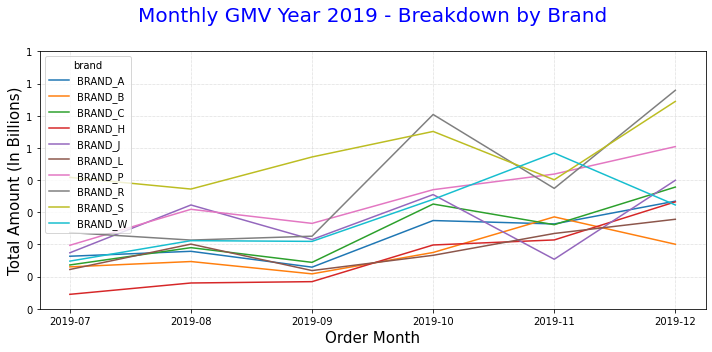

In [5]:
# Membuat Multi-Line Chart
# Import library
import datetime
import pandas as pd
import matplotlib.pyplot as plt
# Baca dataset
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
# Buat kolom baru yang bertipe datetime dalam format '%Y-%m'
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
# Buat Kolom GMV
dataset['gmv'] = dataset['item_price']*dataset['quantity']

# Buat Multi-Line Chart
dataset.groupby(['order_month','brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (In Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

Kustomisasi Legend
1. Legend sangat penting untuk melihat maksud grafik, maka harus diposisikan dengan baik dengan fungsi plt.legend()
2. loc: untuk menentukan posisi legend, berikut beberapa lokasi legend yang bisa didefinisikan:
3. 'upper left', 'upper right', 'lower left', 'lower right':legend diletakkan di pojok dari axes (atas kiri, atas kanan, bawah kiri, atas kiri)
4. 'upper center', 'lower center', 'center left', 'center right': legend diletakkan di tepi axes (atas tengah, bawah tengah, tengah kiri, tengah kanan)
5. 'center': legend diletakkan di tengah-tengah axes
6. 'best': matplotlib akan memilih satu dari sekian kemungkinan lokasi legend di atas yang paling tidak overlap dengan isi grafik
7. bbox_to_anchor: biasanya digunakan untuk adjust lokasi dari legend. Bisa berisi 2 angka yang menunjukkan koordinat x dan y (misal (1.3,0.5) berarti geser 1.6 ke kanan dan 0.5 ke atas). Bisa juga berisi 4 angka, angka ketiga dan keempat menyatakan width (lebar) dan height (tinggi) dari legend.
8. shadow: jika diisi True, maka kotak legend akan memiliki bayangan.
9. ncol: jumlah kolom dari isi legend, default-nya adalah 1
10. fontsize: ukuran huruf pada legend
11. title: memberikan judul pada legend
12. title_fontsize: ukuran huruf pada judul legend

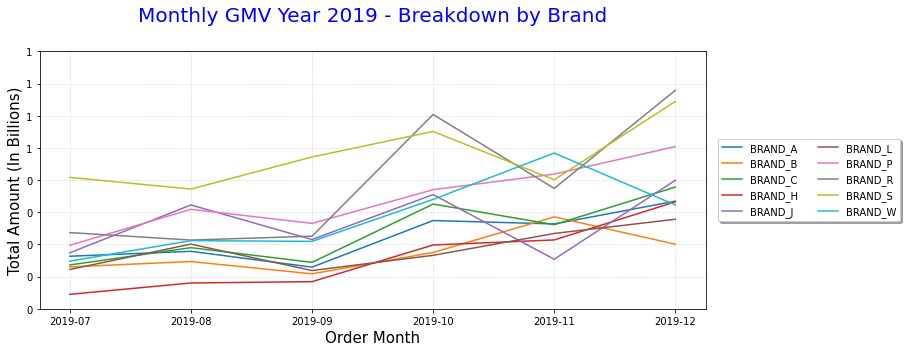

In [8]:
# Import library
import datetime
import pandas as pd
import matplotlib.pyplot as plt
# Baca dataset
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
# Buat kolom baru yang bertipe datetime dalam format '%Y-%m'
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
# Buat Kolom GMV
dataset['gmv'] = dataset['item_price']*dataset['quantity']

# Buat Multi-Line Chart
dataset.groupby(['order_month','brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (In Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.legend(loc='right', bbox_to_anchor=(1.3, 0.5), shadow=True, ncol=2)
plt.show()

Kustomisasi Colormap
1. Terdapat set warna yang disediakan matplotlib : https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html.
2. Menggunakan parameter cmap(), untuk mengambil set warna dan setiap set warna memiliki kegunaan juga
2. Di sini yang digunakan adalah ‘Set1’, yakni satu set warna yang biasa digunakan untuk warna yang diskrit

<Figure size 432x288 with 0 Axes>

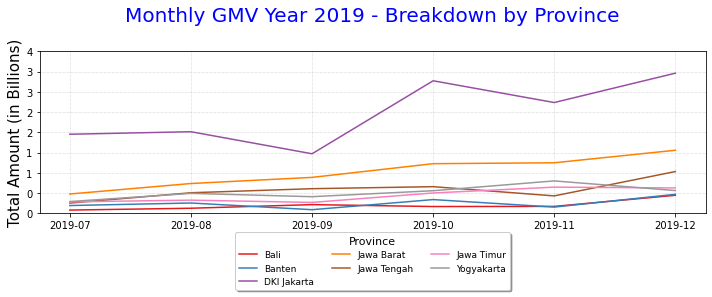

In [9]:
# Breakdown berdasarkan provinsi
# Penerapan Color Map
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

plt.clf()
dataset.groupby(['order_month','province'])['gmv'].sum().unstack().plot(cmap='Set1')
plt.title('Monthly GMV Year 2019 - Breakdown by Province', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), shadow=True, ncol=3, title='Province',fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

Membuat Line Chart GMV Breakdown by Top Provinces
1. Berhubung kita fokusnya ke provinsi-provinsi yang GMV-nya besar, kalau begitu kita highlight untuk top 5 provinsi saja, yang lainnya kita gabungkan menjadi ‘other’.
2. Langkah langkah :
3. mengecek lima provinsi dengan GMV tertinggi
4. membuat kolom baru, misalnya ‘province_top’
5. mengubah ukuran figure, juga bisa menggunakan function plt.gcf().set_size_inches yang diletakkan di akhir code, sebelum plt.show()

      province          gmv
2  DKI Jakarta  14902763000
3   Jawa Barat   6128149000
4  Jawa Tengah   3485884000
6   Yogyakarta   3111241000
5   Jawa Timur   2649486000


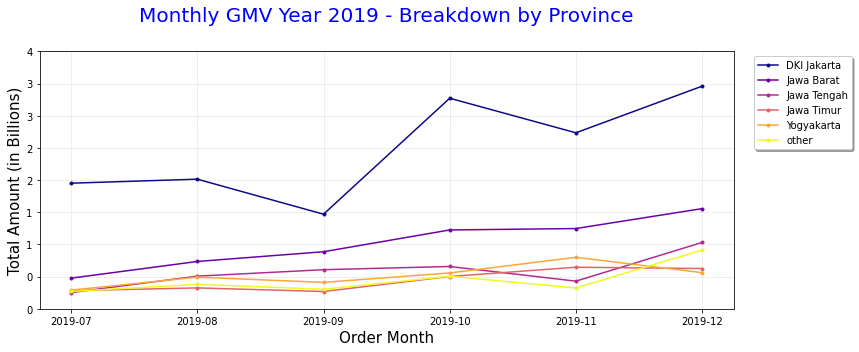

In [10]:
# Membuat Line Chart GMV Breakdown by Top Provinces
import datetime
import pandas as pd

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

# Buat variabel untuk 5 propinsi dengan GMV tertinggi
top_provinces = (dataset.groupby('province')['gmv']
                        .sum()
                        .reset_index()
                        .sort_values(by='gmv',ascending=False)
                        .head(5))
print(top_provinces)

# Buat satu kolom lagi di dataset dengan nama province_top
dataset['province_top'] = dataset['province'].apply(lambda x: x if (x in top_provinces['province'].to_list()) else 'other')

# Plot multi-line chartnya
import matplotlib.pyplot as plt
dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province', loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

Membuat Anotasi
1. Untuk membuat annotate, gunakan function plt.annotate. Parameter pertama adalah isi teksnya, dan parameter kedua adalah koordinat dari point yang dianotasi.
2. xytext: Koordinat dari teks. Jika tidak diisi,maka teks akan diletakkan di koordinat point yang dianotasi (parameter kedua)
3. arrowprops:Konfigurasi dari panah yang ditambahkan di anotasi, berupa dictionary. Beberapa hal yang bisa diset:
4. arrowstyle: menentukan bentuk dari panah penunjuk. Isinya bisa berupa bentuk seperti '->', '-|>', '<->', '-[', dsb. Bisa juga berupa tulisan seperti 'fancy', 'simple', 'wedge', etc.
5. connectionstyle: menentukan bentuk dari garis panahnya. Ada beberapa nilai yang bisa digunakan, misalnya 'arc' dan 'arc3' yang berupa garis lurus, 'angle' untuk garis berbelok siku, 'angle3' untuk garis berbelok lengkung, atau 'bar' untuk berbelok siku dua kali.
6. color: menentukan warna dari panah

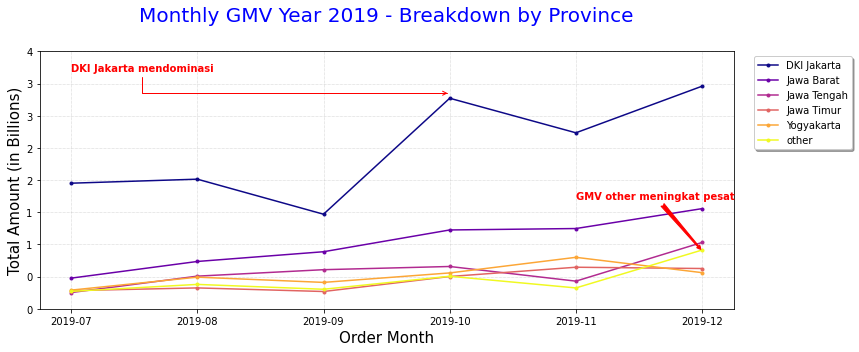

In [11]:
# Menambahkan Anotasi
# Breakdow by Province
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
top_provinces = (dataset.groupby('province')['gmv']
                        .sum()
                        .reset_index()
                        .sort_values(by='gmv',ascending=False)
                        .head(5))
dataset['province_top'] = dataset['province'].apply(lambda x: x if (x in top_provinces['province'].to_list()) else 'other')

dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
# Anotasi pertama
plt.annotate('GMV other meningkat pesat', xy=(5,900000000),
			 xytext=(4, 1700000000), weight='bold', color='red', 
			 arrowprops=dict(arrowstyle='fancy',
							 connectionstyle="arc3",
							 color='red'))
# Anotasi kedua
plt.annotate('DKI Jakarta mendominasi', xy=(3, 3350000000),
			 xytext=(0,3700000000), weight='bold', color='red',
			 arrowprops=dict(arrowstyle='->',
							 connectionstyle="angle",
							 color='red'))
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()